<a href="https://colab.research.google.com/github/furqonfahlevi/classification-ml/blob/main/Assignment_2_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [1018]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# **2. Import Dataset**

In [1019]:
# Import dataset (kendaraan_train.csv) into new dataframe named data_train
data_train = pd.read_csv("https://raw.githubusercontent.com/furqonfahlevi/classification-ml/main/kendaraan_train.csv")
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [1020]:
# Import dataset (kendaraan_test.csv) into new dataframe named data_test
data_test = pd.read_csv("https://raw.githubusercontent.com/furqonfahlevi/classification-ml/main/kendaraan_test.csv")
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [1021]:
print("Data Train Shape", data_train.shape)
print("Data Test Shape", data_test.shape)

Data Train Shape (285831, 12)
Data Test Shape (47639, 11)


# **3. Do pre-processing for dataset**

**Drop unnecessary column**

In [1022]:
del data_train['id']
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


**Duplicated data**

In [1023]:
# Check duplicate data
print("Duplicated data:",data_train.duplicated().sum())
print("Duplicated data:",data_test.duplicated().sum())
data_train.drop_duplicates(inplace=True)
data_test.drop_duplicates(inplace=True)

Duplicated data: 169
Duplicated data: 3


In [1024]:
print("Duplicated data:",data_train.duplicated().sum())
print("Duplicated data:",data_test.duplicated().sum())

Duplicated data: 0
Duplicated data: 0


**Encoder Data**

In [1025]:
categorical = ["Jenis_Kelamin", "Kendaraan_Rusak", "Umur_Kendaraan"]

In [1026]:
data_train = pd.get_dummies(data_train, columns=categorical)
data_train.sample(10)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
141893,66.0,1.0,28.0,1.0,32151.0,26.0,NaN,0,1,0,1,0,1,0,0
177057,27.0,1.0,NaN,1.0,88638.0,NaN,237.0,0,1,0,0,1,0,1,0
143405,25.0,1.0,NaN,1.0,NaN,152.0,231.0,0,1,0,0,1,0,1,0
59104,25.0,1.0,22.0,0.0,46908.0,152.0,NaN,0,0,1,1,0,0,1,0
231898,24.0,1.0,8.0,NaN,34879.0,152.0,256.0,0,1,0,0,1,0,1,0
1404,23.0,1.0,13.0,1.0,28456.0,152.0,71.0,0,1,0,0,1,0,1,0
69437,43.0,1.0,28.0,1.0,39396.0,NaN,142.0,0,0,1,0,1,1,0,0
5917,50.0,1.0,9.0,0.0,41587.0,124.0,16.0,0,0,1,1,0,1,0,0
83546,22.0,1.0,36.0,0.0,34280.0,152.0,250.0,0,0,1,1,0,0,1,0
230389,24.0,1.0,11.0,1.0,22746.0,152.0,34.0,0,1,0,0,1,0,1,0


In [1027]:
data_test = pd.get_dummies(data_test, columns=categorical)
data_test.sample(10)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
14499,60,1,28,0,40045,60,232,0,1,0,1,0,1,0,0
32309,26,1,8,1,73010,152,287,0,1,0,0,1,0,1,0
11565,59,1,46,0,32968,124,72,0,1,0,1,0,0,0,1
28064,26,1,12,0,20347,26,39,0,0,1,1,0,0,1,0
30209,25,1,28,1,35187,152,60,0,0,1,0,1,0,1,0
11921,21,1,46,0,16282,154,85,0,1,0,1,0,1,0,0
22500,44,1,35,0,34347,26,121,0,0,1,0,1,1,0,0
2290,23,1,11,1,35750,152,270,0,1,0,0,1,0,1,0
30652,24,1,27,1,28939,152,46,0,1,0,0,1,0,1,0
7211,21,1,33,1,26526,152,265,0,1,0,0,1,0,1,0


**Check NaN**

In [1028]:
data_train.isna().sum()

Umur                        14199
SIM                         14404
Kode_Daerah                 14291
Sudah_Asuransi              14229
Premi                       14510
Kanal_Penjualan             14297
Lama_Berlangganan           13926
Tertarik                        0
Jenis_Kelamin_Pria              0
Jenis_Kelamin_Wanita            0
Kendaraan_Rusak_Pernah          0
Kendaraan_Rusak_Tidak           0
Umur_Kendaraan_1-2 Tahun        0
Umur_Kendaraan_< 1 Tahun        0
Umur_Kendaraan_> 2 Tahun        0
dtype: int64

In [1029]:
data_train["SIM"].fillna(0, inplace=True)
data_train["Sudah_Asuransi"].fillna(0, inplace=True)
data_train["Umur"].fillna(data_train["Umur"].mean(), inplace=True)
data_train["Premi"].fillna(data_train["Premi"].median(), inplace=True)
data_train["Kanal_Penjualan"].fillna(data_train["Kanal_Penjualan"].mean(), inplace=True)
data_train["Lama_Berlangganan"].fillna(data_train["Lama_Berlangganan"].mean(), inplace=True)
data_train["Kode_Daerah"].fillna(data_train["Kode_Daerah"].mean(), inplace=True)

In [1030]:
data_train.isna().sum()

Umur                        0
SIM                         0
Kode_Daerah                 0
Sudah_Asuransi              0
Premi                       0
Kanal_Penjualan             0
Lama_Berlangganan           0
Tertarik                    0
Jenis_Kelamin_Pria          0
Jenis_Kelamin_Wanita        0
Kendaraan_Rusak_Pernah      0
Kendaraan_Rusak_Tidak       0
Umur_Kendaraan_1-2 Tahun    0
Umur_Kendaraan_< 1 Tahun    0
Umur_Kendaraan_> 2 Tahun    0
dtype: int64

In [1031]:
data_test.isna().sum()

Umur                        0
SIM                         0
Kode_Daerah                 0
Sudah_Asuransi              0
Premi                       0
Kanal_Penjualan             0
Lama_Berlangganan           0
Tertarik                    0
Jenis_Kelamin_Pria          0
Jenis_Kelamin_Wanita        0
Kendaraan_Rusak_Pernah      0
Kendaraan_Rusak_Tidak       0
Umur_Kendaraan_1-2 Tahun    0
Umur_Kendaraan_< 1 Tahun    0
Umur_Kendaraan_> 2 Tahun    0
dtype: int64

**Data Standarization**

In [1032]:
scaler = MinMaxScaler()
columns = ["Umur", "Kode_Daerah", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]
data_train[columns] = scaler.fit_transform(data_train[columns])
data_train.sample(10)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
123455,0.289956,1.0,0.538462,0.0,0.039945,0.759259,0.615917,1,0,0,1,0,1,0,0
50915,0.030769,1.0,0.153846,1.0,0.080013,0.932099,0.499247,0,1,0,0,1,0,1,0
37081,0.307692,1.0,0.538462,0.0,0.041796,0.759259,0.975779,0,1,0,1,0,1,0,0
57338,0.184615,1.0,0.538462,1.0,0.078626,0.932099,0.833910,0,1,0,0,1,0,1,0
159819,0.046154,1.0,0.538462,0.0,0.096535,0.932099,0.352941,0,0,1,1,0,0,1,0
137127,0.876923,1.0,0.507807,1.0,0.000000,0.388889,0.086505,0,1,0,0,1,0,0,0
167732,0.076923,1.0,0.288462,1.0,0.060597,0.932099,0.079585,0,1,0,0,1,0,1,0
285808,0.076923,1.0,0.692308,1.0,0.000000,0.932099,0.100346,0,1,0,0,1,0,1,0
25557,0.030769,1.0,0.826923,1.0,0.058138,0.981481,0.107266,0,0,1,0,1,0,0,0
243337,0.384615,1.0,0.153846,1.0,0.000000,0.759259,0.131488,0,0,1,0,1,1,0,0


In [1033]:
data_test[columns] = scaler.fit_transform(data_test[columns])
data_test.sample(10)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
10750,0.307692,1,0.673077,1,0.067108,0.154321,0.906574,0,1,0,0,1,1,0,0
10768,0.446154,1,0.538462,0,0.000000,0.154321,0.681661,1,0,1,1,0,1,0,0
41301,0.246154,1,0.903846,0,0.056253,0.759259,0.394464,1,1,0,1,0,1,0,0
14667,0.707692,1,0.538462,1,0.056080,0.154321,0.169550,0,0,1,0,1,1,0,0
10210,0.061538,1,0.653846,0,0.058861,0.932099,0.110727,0,1,0,1,0,0,1,0
7490,0.030769,1,0.692308,0,0.054536,0.932099,0.899654,0,0,1,1,0,0,1,0
28945,0.123077,1,0.634615,1,0.048948,0.932099,0.923875,0,1,0,0,1,0,1,0
6821,0.400000,1,0.538462,0,0.000000,0.759259,0.103806,0,0,1,1,0,0,0,1
41943,0.015385,1,0.750000,1,0.048702,0.981481,0.705882,0,1,0,0,1,0,1,0
9967,0.184615,1,0.634615,1,0.000000,0.944444,0.543253,0,1,0,0,1,0,1,0


**Check outliers**

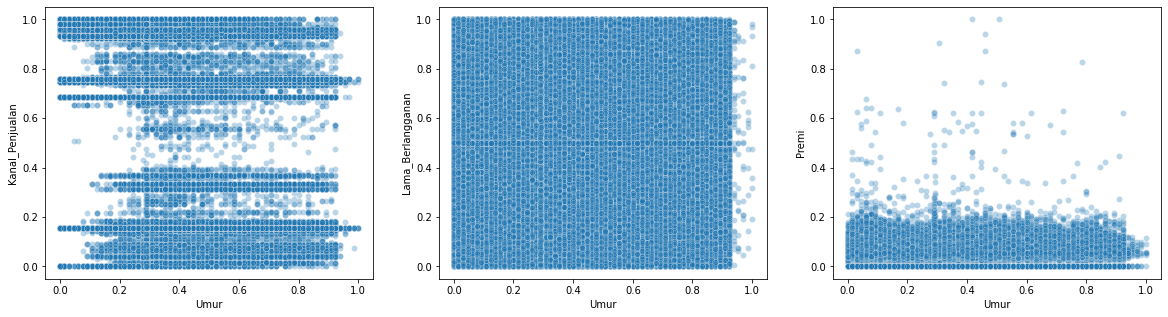

In [1034]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.scatterplot(data=data_train, x="Umur", y="Kanal_Penjualan", ax=axes[0], alpha=0.3)
sns.scatterplot(data=data_train, x="Umur", y="Lama_Berlangganan", ax=axes[1], alpha=0.3)
sns.scatterplot(data=data_train, x="Umur", y="Premi", ax=axes[2], alpha=0.3)
plt.show()

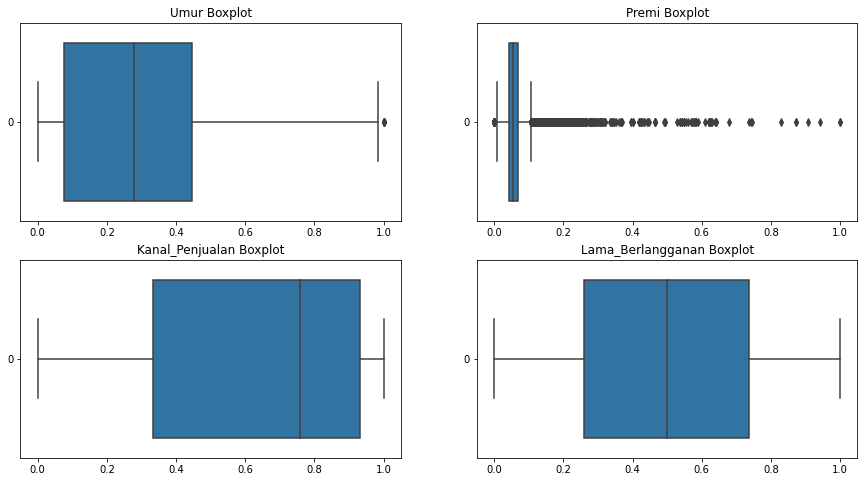

In [1035]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

axes[0, 0].title.set_text("Umur Boxplot")
axes[0, 1].title.set_text("Premi Boxplot")
axes[1, 0].title.set_text("Kanal_Penjualan Boxplot")
axes[1, 1].title.set_text("Lama_Berlangganan Boxplot")

sns.boxplot(data=data_train["Umur"], ax=axes[0, 0], orient="horizontal")
sns.boxplot(data=data_train["Premi"], ax=axes[0, 1], orient="horizontal")
sns.boxplot(data=data_train["Kanal_Penjualan"], ax=axes[1, 0], orient="horizontal")
sns.boxplot(data=data_train["Lama_Berlangganan"], ax=axes[1, 1], orient="horizontal")
plt.show()

**Z-Score method**

In [1036]:
columns = ['Kanal_Penjualan', 'Premi', 'Umur', 'Lama_Berlangganan']
z = np.abs(stats.zscore(data_train[columns]))
threshold = 3

data_train_new = data_train[(z < threshold).all(axis=1)]
data_train_new.sample(10)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
54752,0.338462,1.0,0.115385,0.0,0.061423,0.932099,0.543253,0,1,0,1,0,1,0,0
157759,0.123077,1.0,0.788462,1.0,0.082783,0.932099,0.249135,0,0,1,0,1,0,1,0
12740,0.476923,1.0,0.596154,0.0,0.000000,0.364198,0.404844,0,0,1,1,0,1,0,0
35358,0.753846,1.0,0.153846,0.0,0.074306,0.148148,0.397924,0,1,0,1,0,1,0,0
258798,0.415385,0.0,0.538462,0.0,0.062943,0.759259,0.086505,0,1,0,1,0,1,0,0
255695,0.584615,1.0,0.538462,0.0,0.068699,0.746914,0.044983,0,1,0,1,0,0,0,1
54451,0.446154,1.0,0.788462,1.0,0.077312,0.759259,0.602076,0,0,1,0,1,1,0,0
233626,0.289956,0.0,0.961538,1.0,0.090919,0.759259,0.422145,0,0,1,0,1,1,0,0
38103,0.289956,1.0,0.538462,1.0,0.063936,0.759259,0.948097,0,0,1,0,1,1,0,0
48945,0.289956,1.0,0.288462,0.0,0.066463,0.154321,0.499247,0,1,0,1,0,1,0,0


In [1037]:
columns = ['Kanal_Penjualan', 'Premi', 'Umur', 'Lama_Berlangganan']
z = np.abs(stats.zscore(data_test[columns]))
threshold = 3

data_test_new = data_test[(z < threshold).all(axis=1)]
data_test_new.sample(10)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
36567,0.630769,1,0.538462,0,0.076410,0.154321,0.439446,0,1,0,0,1,1,0,0
35334,0.015385,1,0.557692,1,0.042602,0.932099,0.280277,0,0,1,0,1,0,1,0
6084,0.261538,1,0.134615,0,0.061557,0.759259,0.965398,0,0,1,1,0,1,0,0
46127,0.046154,1,0.173077,0,0.048494,0.932099,0.138408,0,0,1,1,0,0,1,0
43401,0.553846,1,0.538462,0,0.074220,0.154321,0.958478,0,1,0,1,0,1,0,0
23779,0.030769,1,0.288462,0,0.046272,0.981481,0.557093,0,1,0,1,0,0,1,0
12315,0.507692,1,0.538462,1,0.074676,0.759259,0.031142,0,0,1,0,1,1,0,0
34189,0.030769,1,0.538462,1,0.073342,0.932099,0.889273,0,0,1,1,0,0,1,0
44256,0.092308,1,0.788462,0,0.093391,0.932099,0.359862,0,0,1,1,0,0,1,0
17803,0.030769,1,0.403846,1,0.035953,0.932099,0.356401,0,0,1,0,1,0,1,0


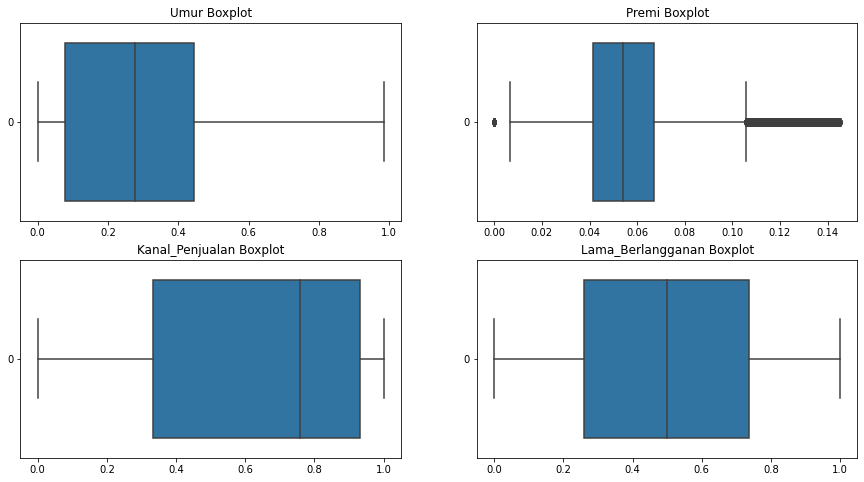

In [1038]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

axes[0, 0].title.set_text("Umur Boxplot")
axes[0, 1].title.set_text("Premi Boxplot")
axes[1, 0].title.set_text("Kanal_Penjualan Boxplot")
axes[1, 1].title.set_text("Lama_Berlangganan Boxplot")

sns.boxplot(data=data_train_new["Umur"], ax=axes[0, 0], orient="horizontal")
sns.boxplot(data=data_train_new["Premi"], ax=axes[0, 1], orient="horizontal")
sns.boxplot(data=data_train_new["Kanal_Penjualan"], ax=axes[1, 0], orient="horizontal")
sns.boxplot(data=data_train_new["Lama_Berlangganan"], ax=axes[1, 1], orient="horizontal")
plt.show()

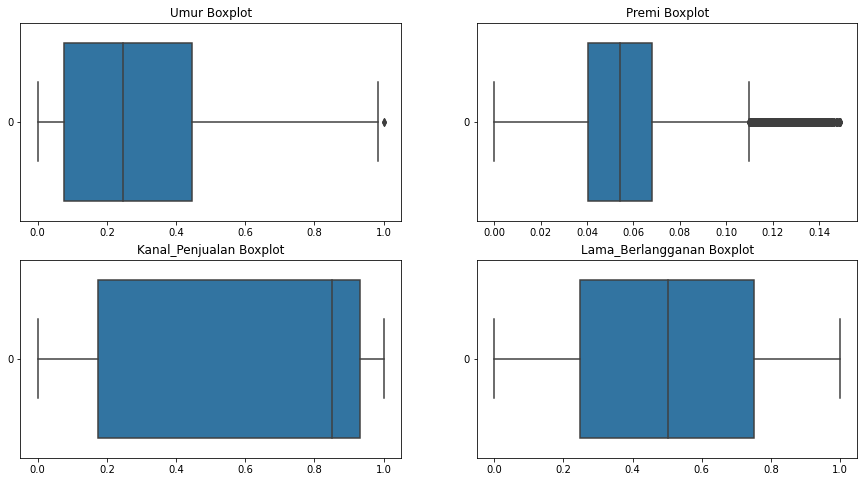

In [1039]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

axes[0, 0].title.set_text("Umur Boxplot")
axes[0, 1].title.set_text("Premi Boxplot")
axes[1, 0].title.set_text("Kanal_Penjualan Boxplot")
axes[1, 1].title.set_text("Lama_Berlangganan Boxplot")

sns.boxplot(data=data_test_new["Umur"], ax=axes[0, 0], orient="horizontal")
sns.boxplot(data=data_test_new["Premi"], ax=axes[0, 1], orient="horizontal")
sns.boxplot(data=data_test_new["Kanal_Penjualan"], ax=axes[1, 0], orient="horizontal")
sns.boxplot(data=data_test_new["Lama_Berlangganan"], ax=axes[1, 1], orient="horizontal")
plt.show()

In [1040]:
print(f"Data Train New Shape: {data_train_new.shape}")
print(f"Data Test New Shape: {data_test.shape}")

Data Train New Shape: (284032, 15)
Data Test New Shape: (47636, 15)


In [1041]:
data_train_new = data_train_new.sample(1000)

**Data Splitting**

In [1042]:
X = data_train_new.drop(columns=["Tertarik"])
y = data_train_new[["Tertarik"]]

In [1043]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [1044]:
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

X_train shape: (800, 14) | X_test shape: (200, 14)
y_train shape: (800, 1) | y_test shape: (200, 1)


# **Library hehehe**

In [1045]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [1046]:
knn = KNeighborsClassifier(n_neighbors=2, p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [1047]:
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))
print(confusion_matrix(y_test, y_pred))

Accuracy with K-NN: 83.00%
[[165   9]
 [ 25   1]]


In [1048]:
len(y_pred)

200

# **4. Implementation model**

**Distance methods**

In [1049]:
def manhattan(x, y):
  return sum([abs(x[i] - y[i]) for i in range(len(x))])

def euclidean(x, y):
  return sqrt(sum([(x[i] - y[i]) ** 2 for i in range(len(x))]))

def minkowski(x, y, p):
  return sum([abs(x[i] - y[i]) ** p for i in range(len(x))]) ** (1./ p)

def supremum(x, y):
  return max([abs(x[i] - y[i]) for i in range(len(x))])

**Accuracy score**

In [1050]:
def accuracy_metric(prediction, test):
  correct = 0
  for i in range(len(prediction)):
    if prediction[i] == test[i]:
      correct += 1
  return correct / float(len(prediction)) * 100.0

**Confusion matrix**

In [1056]:
def conf_matrix(prediction, test):
  unique = set(prediction)
  matrix = [list() for x in range(len(unique))]
  for i in range(len(unique)):
    matrix[i] = [0 for x in range(len(unique))]
  lookup = dict()
  for i, value in enumerate(unique):
    lookup[value] = i
  for i in range(len(prediction)):
    x = lookup[prediction[i]]
    y = lookup[test[i]]
    matrix[y][x] += 1
  return matrix

**kNN**

In [1052]:
def kNN(k, p, X_train, X_test, y_train):

  df_concat = X_train.copy()
  df_concat["Tertarik"] = y_train
  y_pred = []

  for test in X_test.values:
    distance = []

    for train in X_train.values:
      distance.append(minkowski(train, test, p))

    df_concat["distance"] = distance
    df_sorted = df_concat.sort_values(by=["distance"])[:k]
    y_pred.append(df_sorted["Tertarik"].mode().values[0])

  return y_pred

In [1053]:
y_pred = kNN(2, 1, X_train, X_test, y_train)

In [1057]:
precision = accuracy_metric(y_pred, list(y_test["Tertarik"]))
print("Accuracy with K-NN: {0:.2f}%".format(precision))
print(conf_matrix(y_pred, list(y_test["Tertarik"])))

Accuracy with K-NN: 83.00%
[[165, 9], [25, 1]]
